In [1]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None) # we want to display all columns in this notebook

# aesthetics
default_color_1 = 'darkblue'
default_color_2 = 'darkgreen'
default_color_3 = 'darkred'

In [3]:
df = pd.read_excel("C:/Users/Reena/Desktop/excel project/depression analysis/mental_health_finaldata_1.xlsx")
df

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,20-25,Male,Corporate,Go out Every day,No,Yes,No,Yes,Yes,Medium,No,Yes,Maybe
820,20-25,Male,Others,1-14 days,Yes,Yes,No,Yes,Maybe,Low,No,Maybe,Maybe
821,20-25,Male,Student,More than 2 months,Yes,Maybe,Maybe,No,Yes,High,Yes,Yes,Maybe
822,16-20,Male,Business,15-30 days,No,No,Maybe,No,Maybe,Low,Yes,No,Maybe


In [5]:
df.head(10)

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No
5,25-30,Male,Housewife,More than 2 months,No,Yes,Yes,Yes,Yes,Medium,No,Maybe,Maybe
6,16-20,Female,Business,Go out Every day,Yes,Yes,Maybe,No,Yes,Low,No,Maybe,Maybe
7,25-30,Female,Student,1-14 days,Yes,No,Maybe,Maybe,Maybe,High,No,No,Yes
8,30-Above,Male,Others,Go out Every day,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,Maybe
9,20-25,Male,Corporate,Go out Every day,Maybe,Maybe,Yes,Yes,Yes,Low,No,Maybe,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      824 non-null    object
 1   Gender                   824 non-null    object
 2   Occupation               824 non-null    object
 3   Days_Indoors             824 non-null    object
 4   Growing_Stress           824 non-null    object
 5   Quarantine_Frustrations  824 non-null    object
 6   Changes_Habits           824 non-null    object
 7   Mental_Health_History    824 non-null    object
 8   Weight_Change            824 non-null    object
 9   Mood_Swings              824 non-null    object
 10  Coping_Struggles         824 non-null    object
 11  Work_Interest            824 non-null    object
 12  Social_Weakness          824 non-null    object
dtypes: object(13)
memory usage: 83.8+ KB


In [7]:
df.describe()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
count,824,824,824,824,824,824,824,824,824,824,824,824,824
unique,4,2,5,5,3,3,3,3,3,3,2,3,3
top,30-Above,Female,Housewife,31-60 days,Yes,Yes,Yes,No,Maybe,Medium,No,No,Maybe
freq,222,434,185,171,301,304,305,284,281,280,414,295,287


In [8]:
df.shape

(824, 13)

In [9]:
features_num = []

# categorical features
features_cat = ['Age', 'Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress',
       'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History',
       'Weight_Change', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest',
       'Social_Weakness']

# all features combined
features = features_num + features_cat

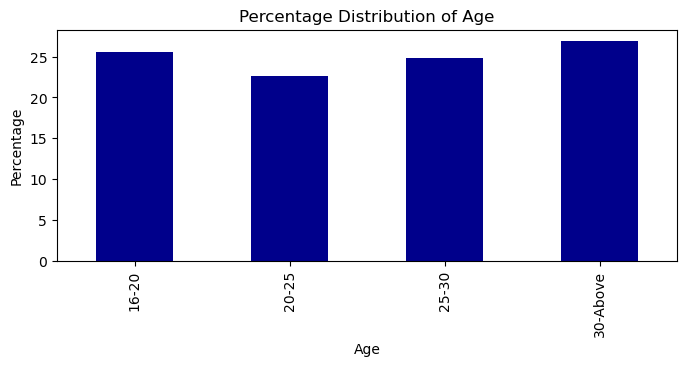

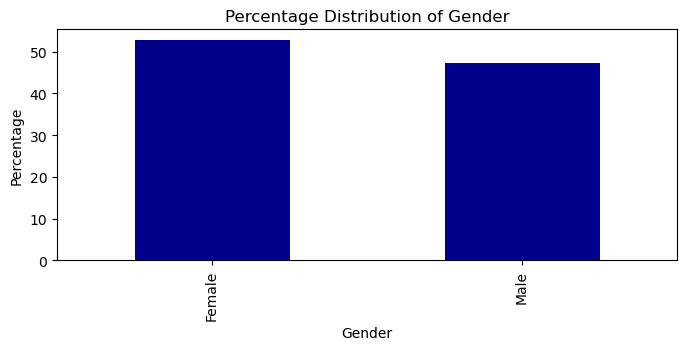

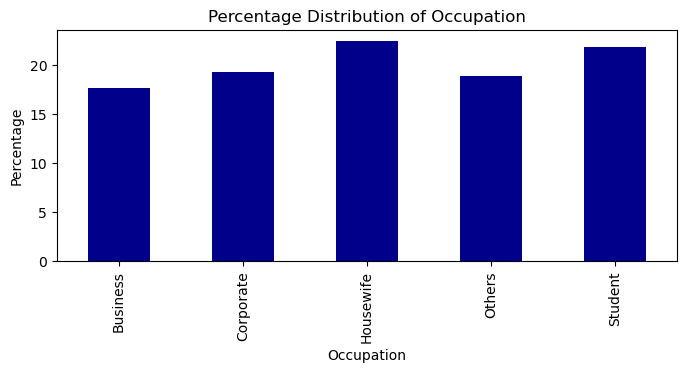

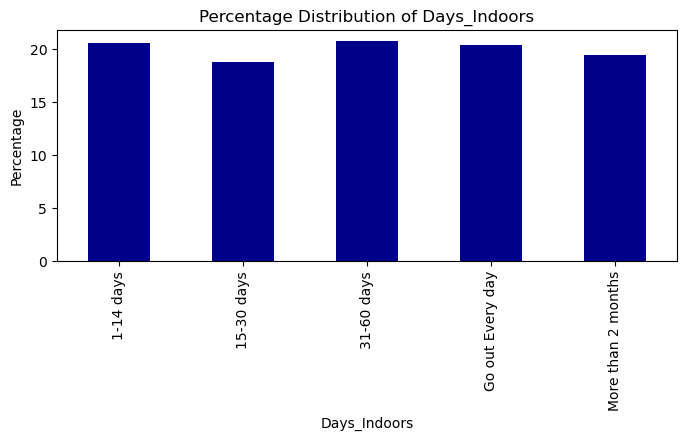

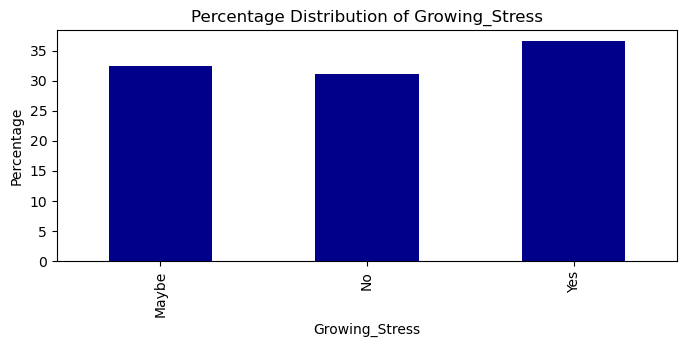

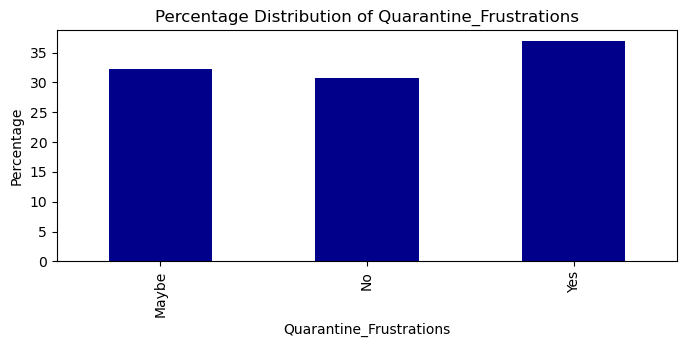

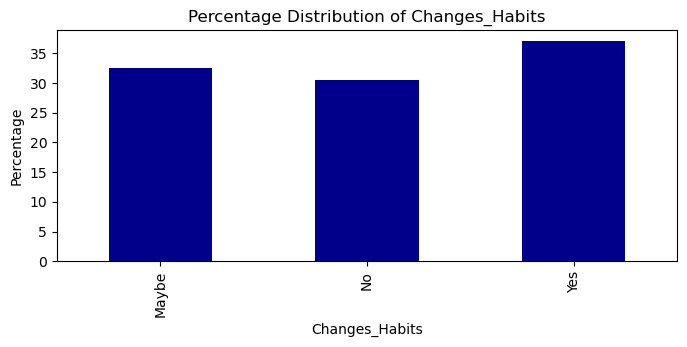

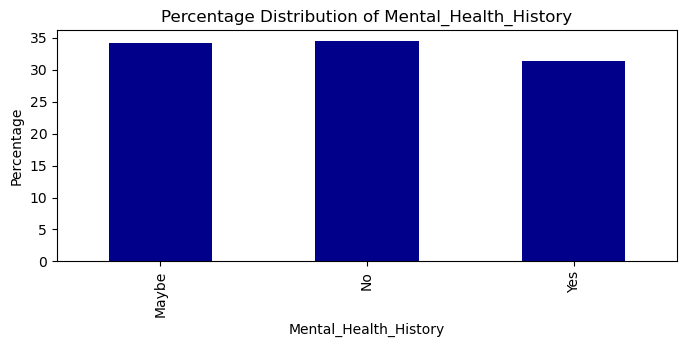

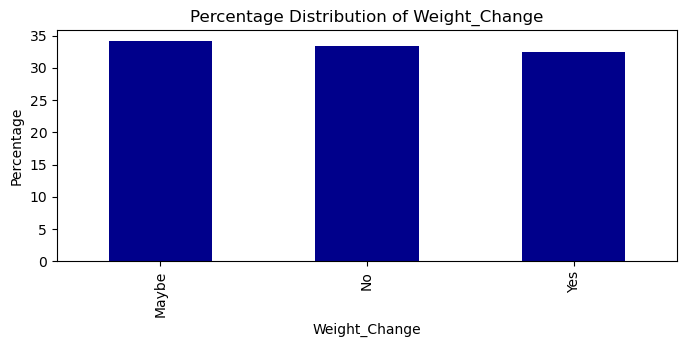

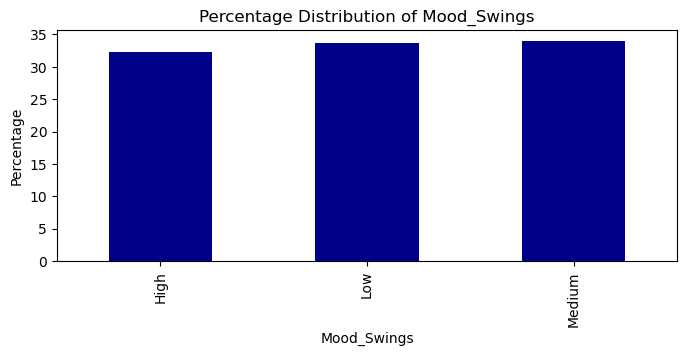

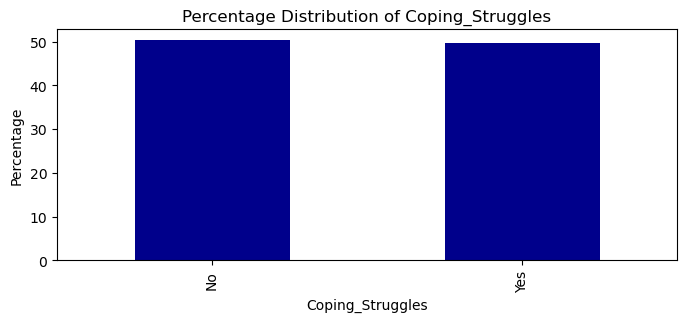

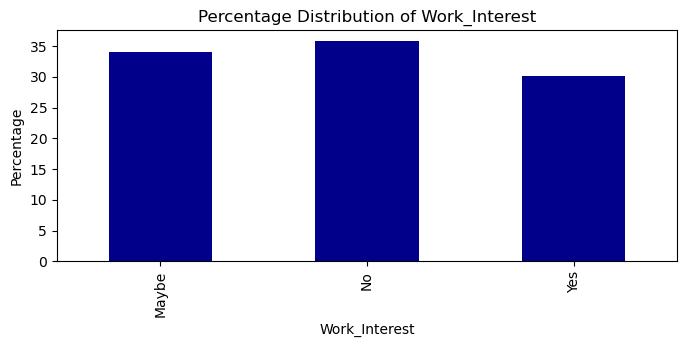

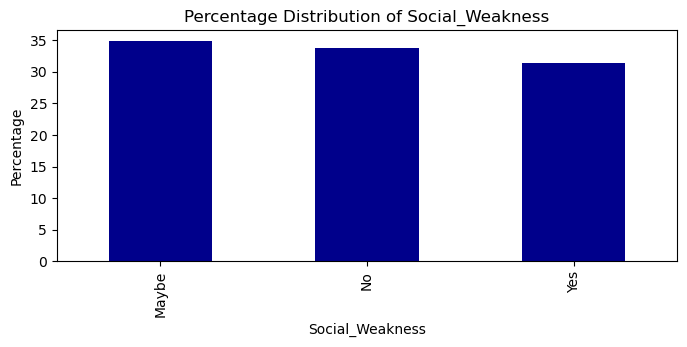

In [10]:
# plot categorical feature distributions (train and test)
for f in features_cat:
    # Calculate value counts and percentages
    value_counts = df[f].value_counts(normalize=True) * 100

    # Plot the bar chart
    plt.figure(figsize=(8, 3))
    value_counts.sort_index().plot(kind='bar', color=default_color_1)

    # Add labels and title
    plt.title(f'Percentage Distribution of {f}')
    plt.xlabel(f)
    plt.ylabel('Percentage')

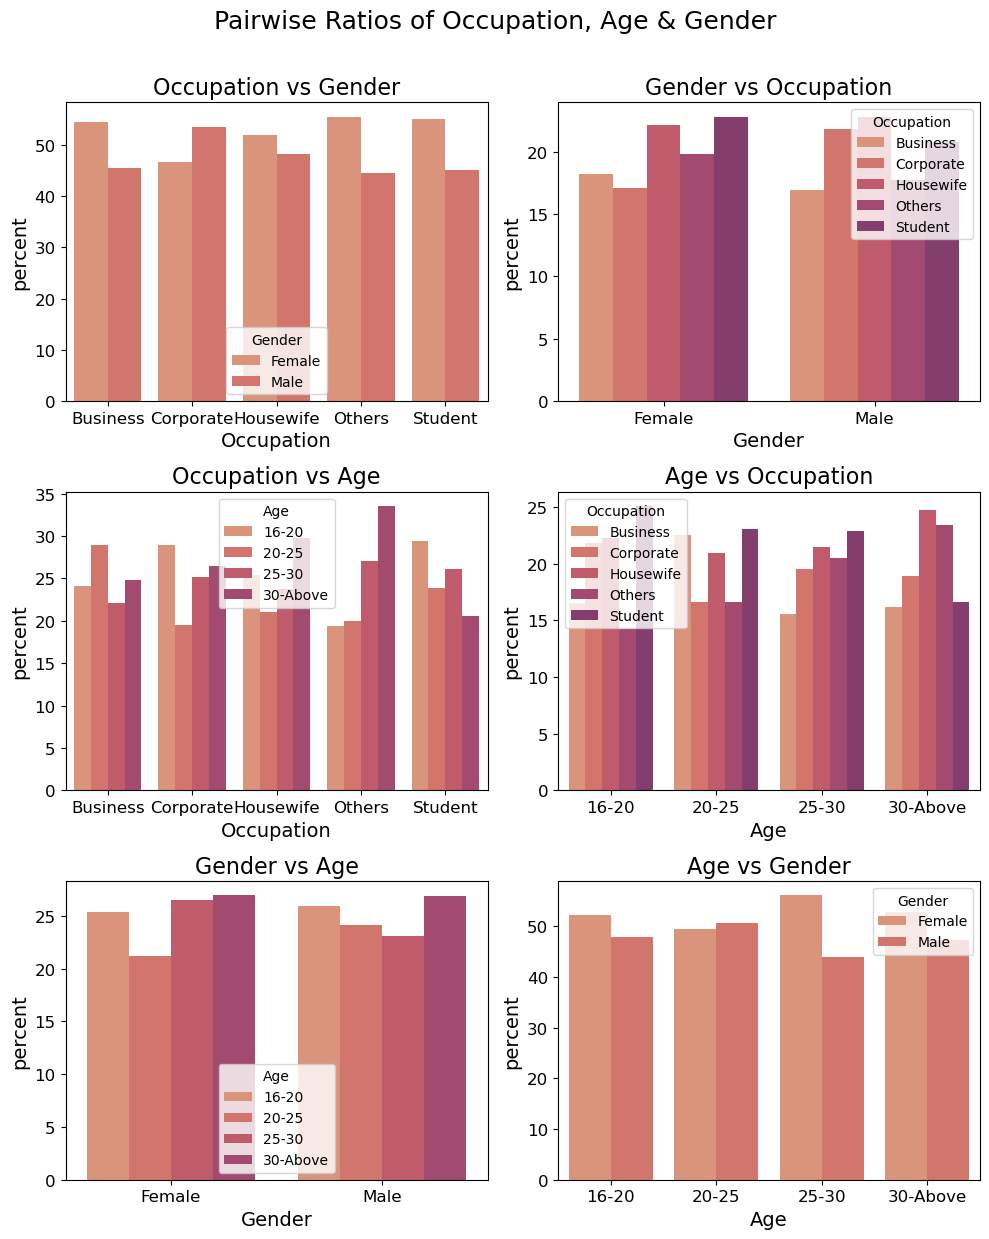

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(10, 13))
x_columns = ['Occupation', 'Gender', 'Occupation', 'Age', 'Gender', 'Age']
hue_columns = ['Gender', 'Occupation', 'Age', 'Occupation', 'Age', 'Gender']

for ax, x_column, hue_column in zip(axes.flatten(), x_columns, hue_columns):
    # Calculate percentages
    counts = df.groupby([x_column, hue_column]).size().reset_index(name='count')
    total_counts = counts.groupby(x_column)['count'].transform('sum')
    counts['percent'] = (counts['count'] / total_counts) * 100

    # Plot barplot with percentages
    sns.barplot(data=counts, x=x_column, y='percent', hue=hue_column, palette=sns.color_palette("flare"), ax=ax)

    # Set labels and title
    ax.set_title(f'{x_column} vs {hue_column}', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=12)
    ax.set_xlabel(x_column, fontsize=14)
    ax.set_ylabel('percent', fontsize=14)

# Set the main title outside the loop
fig.suptitle('Pairwise Ratios of Occupation, Age & Gender', fontsize=18)

# Adjust layout
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

# Show the plot
plt.show()

In [12]:
df['Gender+Age'] = df.Gender + '-' + df.Age

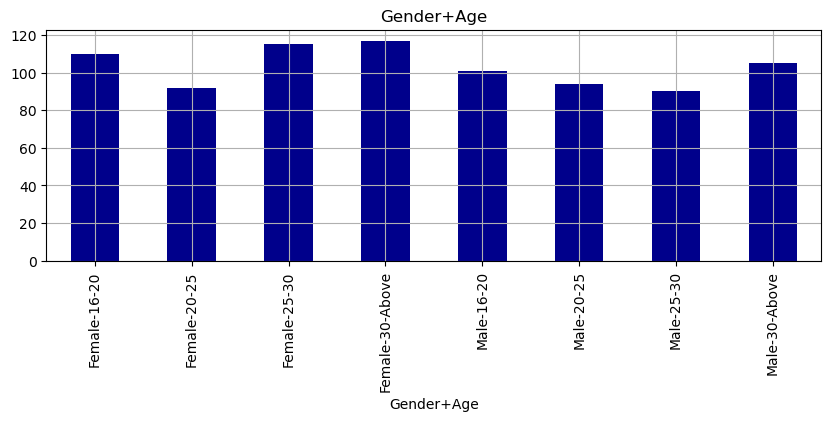

In [12]:
f = 'Gender+Age'
plt.figure(figsize=(10,3))
df[f].value_counts().sort_index().plot(kind='bar', color=default_color_1)
plt.title(f)
plt.grid()
plt.show()

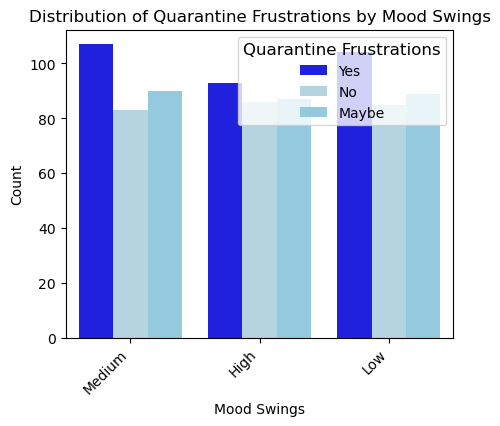

In [13]:
colors_quarantine_frustrations_mood_swings = ['blue', 'lightblue', 'skyblue']

plt.figure(figsize=(5, 4))

# Using Seaborn to create a stacked bar plot
sns.countplot(x='Mood_Swings', hue='Quarantine_Frustrations', data=df, palette=colors_quarantine_frustrations_mood_swings)
plt.xlabel('Mood Swings')
plt.ylabel('Count')
plt.title('Distribution of Quarantine Frustrations by Mood Swings')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Quarantine Frustrations', title_fontsize='12', loc='upper right')
plt.show()

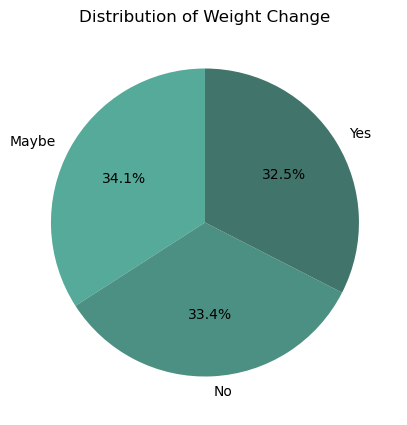

In [14]:
weight_change_counts = df['Weight_Change'].value_counts()

plt.figure(figsize=(5, 5))

# Using Matplotlib to create a pie chart
plt.pie(weight_change_counts, labels=weight_change_counts.index, autopct='%1.1f%%', colors=sns.color_palette('dark:#5A9_r'), startangle=90)
plt.title('Distribution of Weight Change')
plt.show()
